**Experiment 4: Binary Classification using Linear and Kernel-Based Model**

**1. Load the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/spambase_csv_Kaggle.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**2. Data Preprocessing**

In [ ]:
#Checking missing values
print(df.isnull().sum()) #No null vals so no need to handle

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

**3. Exploraratory Data Analysis**

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())

(4601, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report      

**4.Split the dataset into training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3680, 57)
Testing data shape: (921, 57)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply same scaling to test data
X_test_scaled = scaler.transform(X_test)

**5.Train Baseline Logistic Regression**

Uses L2 regularization since most of the features are correlated , use of l1 makes some features 0 which leads to loss of information.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import time

#Baseline model
start_time = time.time()
baseline_model = LogisticRegression(max_iter= 1000)
baseline_model.fit(X_train_scaled,y_train)

end_time = time.time()
#Predictions
y_pred = baseline_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)

#Evaluation
print("Baseline Accuracy:",accuracy_score(y_test,y_pred))
print("Baseline Precision:",precision_score(y_test,y_pred))
print("Baseline Recall:",recall_score(y_test,y_pred))
print("Baseline F1-Score:",f1_score(y_test,y_pred))
print("Baseline Training Time(s):",end_time-start_time)
print("Confusion Matrix:\n",cm)
print("Classification Report:\n",classification_report(y_test,y_pred))

Baseline Accuracy: 0.9294245385450597
Baseline Precision: 0.9209039548022598
Baseline Recall: 0.8980716253443526
Baseline F1-Score: 0.9093444909344491
Baseline Training Time(s): 0.056081533432006836
Confusion Matrix:
 [[530  28]
 [ 37 326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



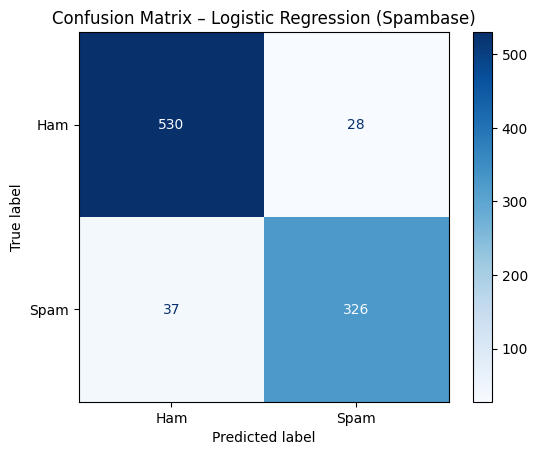

In [ ]:
#Visualization of Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Ham", "Spam"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression (Spambase)")
plt.savefig("confusion_matrix_logistic_regression.png",dpi=120)
plt.show()

**6.Tune Logistic Regression Hyperparameters**

**Justification of choosing Accuracy:**

- Dataset is not highly imbalanced
- Precision:

      Ignores:
      True negatives
      Overall correctness
- Recall: May allow too many false alarms (FP)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'solver':['liblinear'],
        'penalty':['l1','l2'],
        'C': [0.01,0.1,1,10,100]

    },
    {
        'solver':['saga'],
        'penalty':['l1','l2'],
        'C': [0.01,0.1,1,10,100]

    }
]
log_reg = LogisticRegression(max_iter = 1000)
grid_search = GridSearchCV(estimator=log_reg,param_grid = param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['saga']}],
             scoring='accuracy')



# **7. Train SVM with different kernels**



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import time

# LINEAR KERNEL
start_lin = time.time()
svm_baseline_linear = SVC(kernel='linear', C=1) # Renamed variable
svm_baseline_linear.fit(X_train_scaled, y_train)

end_lin = time.time()

svm_linear_train_time = end_lin - start_lin

y_pred_svm_linear = svm_baseline_linear.predict(X_test_scaled)


print("Confusion Matrix(Linear Kernel):\n", confusion_matrix(y_test, y_pred_svm_linear))

# POLYNOMIAL KERNEL
start_poly = time.time()
svm_baseline_poly = SVC(kernel='poly', C=1)
svm_baseline_poly.fit(X_train_scaled, y_train)
end_poly = time.time()
svm_poly_train_time = end_poly - start_poly

y_pred_svm_poly = svm_baseline_poly.predict(X_test_scaled) # Corrected prediction variable


print("Confusion Matrix(Polynomial Kernel):\n", confusion_matrix(y_test, y_pred_svm_poly))

# RBF KERNEL
start_rbf = time.time()
svm_baseline_rbf = SVC(kernel='rbf', C=1) # Renamed variable
svm_baseline_rbf.fit(X_train_scaled, y_train)
end_rbf = time.time()
svm_rbf_train_time = end_rbf - start_rbf

y_pred_svm_rbf = svm_baseline_rbf.predict(X_test_scaled) # Uses svm_baseline_rbf


print("Confusion Matrix(RBF Kernel):\n", confusion_matrix(y_test, y_pred_svm_rbf))

# SIGMOID KERNEL
start_sig = time.time()
svm_baseline_sig = SVC(kernel='sigmoid', C=1) # Renamed variable
svm_baseline_sig.fit(X_train_scaled, y_train)
end_sig = time.time()
svm_sig_train_time = end_sig - start_sig

y_pred_svm_sig = svm_baseline_sig.predict(X_test_scaled) # Uses svm_baseline_sig


print("Confusion Matrix(Sigmoid Kernel):\n", confusion_matrix(y_test, y_pred_svm_sig))

Confusion Matrix(Linear Kernel):
 [[530  28]
 [ 37 326]]
Confusion Matrix(Polynomial Kernel):
 [[551   7]
 [196 167]]
Confusion Matrix(RBF Kernel):
 [[533  25]
 [ 42 321]]
Confusion Matrix(Sigmoid Kernel):
 [[508  50]
 [ 56 307]]


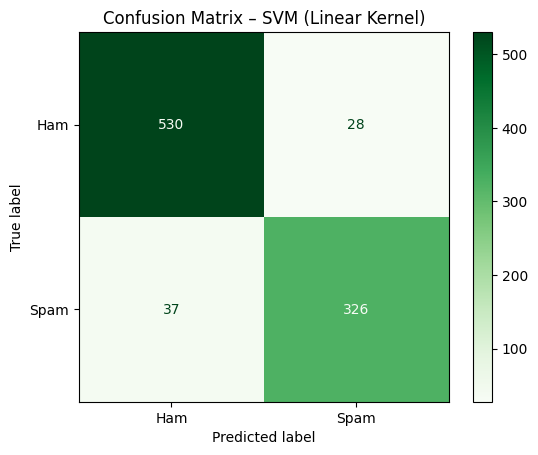

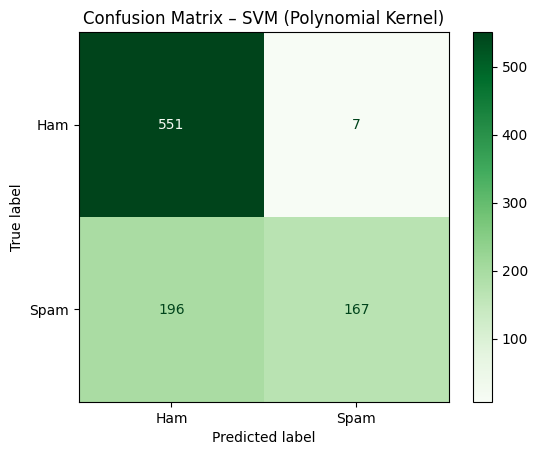

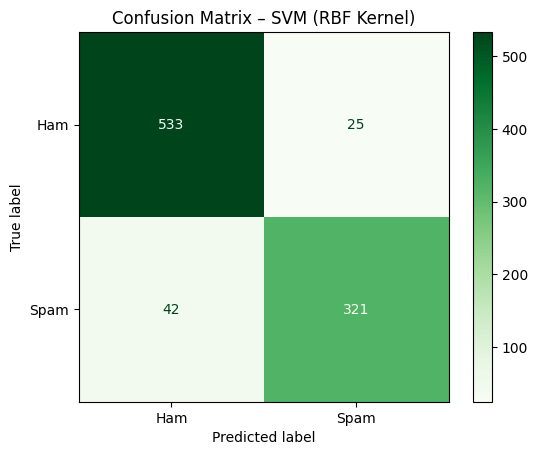

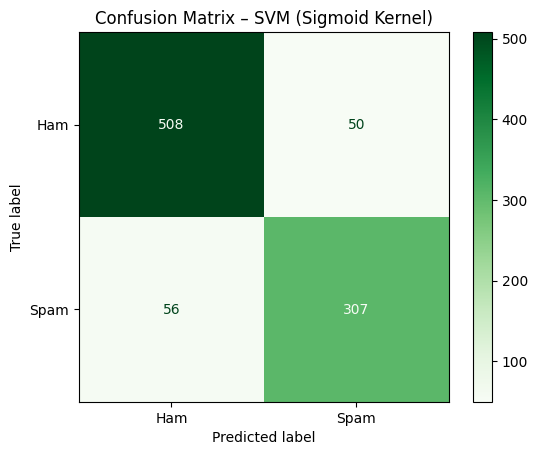

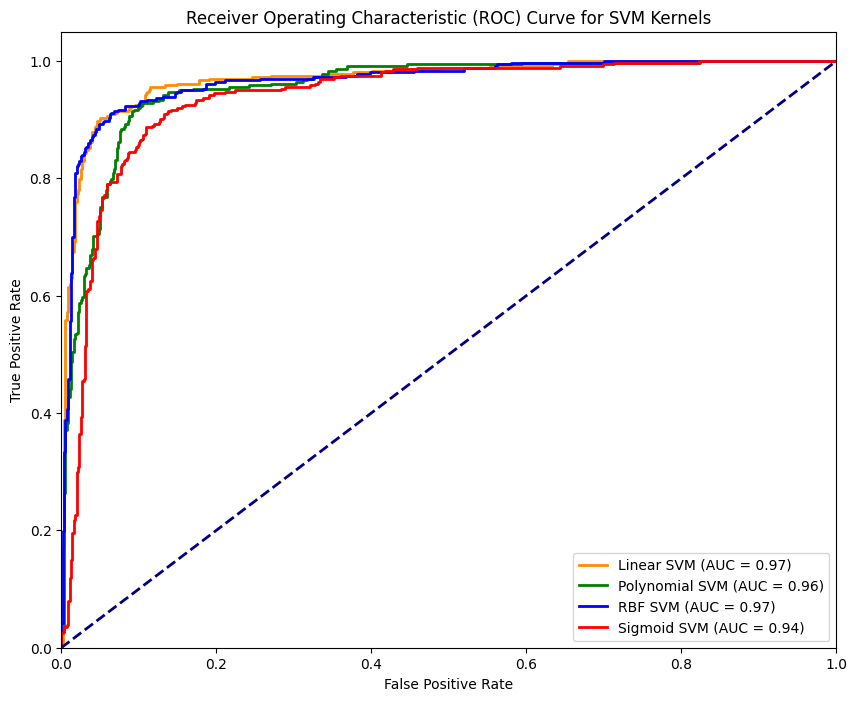

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

# Confusion Matrix for Linear SVM
cm_linear = confusion_matrix(y_test, y_pred_svm_linear)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=["Ham", "Spam"])
disp_linear.plot(cmap="Greens")
plt.title("Confusion Matrix – SVM (Linear Kernel)")
plt.savefig("confusion_matrix_svm_linear.png",dpi=120)
plt.show()

# Confusion Matrix for Polynomial SVM
cm_poly = confusion_matrix(y_test, y_pred_svm_poly)
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=["Ham", "Spam"])
disp_poly.plot(cmap="Greens")
plt.title("Confusion Matrix – SVM (Polynomial Kernel)")
plt.savefig("confusion_matrix_svm_polynomial.png",dpi=120)
plt.show()

# Confusion Matrix for RBF SVM
cm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=["Ham", "Spam"])
disp_rbf.plot(cmap="Greens")
plt.title("Confusion Matrix – SVM (RBF Kernel)")
plt.savefig("confusion_matrix_svm_rbf.png",dpi=120)
plt.show()

# Confusion Matrix for Sigmoid SVM
cm_sig = confusion_matrix(y_test, y_pred_svm_sig)
disp_sig = ConfusionMatrixDisplay(confusion_matrix=cm_sig, display_labels=["Ham", "Spam"])
disp_sig.plot(cmap="Greens")
plt.title("Confusion Matrix – SVM (Sigmoid Kernel)")
plt.savefig("confusion_matrix_svm_sigmoid.png",dpi=120)
plt.show()

# Plotting ROC Curves
plt.figure(figsize=(10, 8))

# Linear Kernel
y_score_linear = svm_baseline_linear.decision_function(X_test_scaled)
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_score_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)
plt.plot(fpr_linear, tpr_linear, color='darkorange', lw=2, label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')

# Polynomial Kernel
y_score_poly = svm_baseline_poly.decision_function(X_test_scaled)
fpr_poly, tpr_poly, _ = roc_curve(y_test, y_score_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)
plt.plot(fpr_poly, tpr_poly, color='green', lw=2, label=f'Polynomial SVM (AUC = {roc_auc_poly:.2f})')

# RBF Kernel
y_score_rbf = svm_baseline_rbf.decision_function(X_test_scaled)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_score_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
plt.plot(fpr_rbf, tpr_rbf, color='blue', lw=2, label=f'RBF SVM (AUC = {roc_auc_rbf:.2f})')

# Sigmoid Kernel
y_score_sig = svm_baseline_sig.decision_function(X_test_scaled)
fpr_sig, tpr_sig, _ = roc_curve(y_test, y_score_sig)
roc_auc_sig = auc(fpr_sig, tpr_sig)
plt.plot(fpr_sig, tpr_sig, color='red', lw=2, label=f'Sigmoid SVM (AUC = {roc_auc_sig:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Kernels')
plt.legend(loc='lower right')
plt.savefig("confusion_matrix_svm.png",dpi=120)
plt.show()

**Evaluation**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import time

# LINEAR KERNEL
start_lin = time.time()
svm_baseline_linear = SVC(kernel='linear', C=1)
svm_baseline_linear.fit(X_train_scaled, y_train)
end_lin = time.time()
svm_linear_train_time = end_lin - start_lin
y_pred_svm_linear = svm_baseline_linear.predict(X_test_scaled)

# POLYNOMIAL KERNEL
start_poly = time.time()
svm_baseline_poly = SVC(kernel='poly', C=1)
svm_baseline_poly.fit(X_train_scaled, y_train)
end_poly = time.time()
svm_poly_train_time = end_poly - start_poly
y_pred_svm_poly = svm_baseline_poly.predict(X_test_scaled)

# RBF KERNEL
start_rbf = time.time()
svm_baseline_rbf = SVC(kernel='rbf', C=1)
svm_baseline_rbf.fit(X_train_scaled, y_train)
end_rbf = time.time()
svm_rbf_train_time = end_rbf - start_rbf
y_pred_svm_rbf = svm_baseline_rbf.predict(X_test_scaled)

# SIGMOID KERNEL
start_sig = time.time()
svm_baseline_sig = SVC(kernel='sigmoid', C=1)
svm_baseline_sig.fit(X_train_scaled, y_train)
end_sig = time.time()
svm_sig_train_time = end_sig - start_sig
y_pred_svm_sig = svm_baseline_sig.predict(X_test_scaled)

#Accuracy

print("Baseline SVM Accuracy(Linear Kernel):", accuracy_score(y_test, y_pred_svm_linear))
print("Baseline SVM Accuracy(Polynomial Kernel):", accuracy_score(y_test, y_pred_svm_poly))
print("Baseline SVM Accuracy(RBF Kernel):", accuracy_score(y_test, y_pred_svm_rbf))
print("Baseline SVM Accuracy(Sigmoid Kernel):", accuracy_score(y_test, y_pred_svm_sig))

#F1 Score

print("Baseline SVM F1-Score(Linear Kernel):", f1_score(y_test, y_pred_svm_linear))
print("Baseline SVM F1-Score(Polynomial Kernel):", f1_score(y_test, y_pred_svm_poly))
print("Baseline SVM F1-Score(RBF Kernel):", f1_score(y_test, y_pred_svm_rbf))
print("Baseline SVM F1-Score(Sigmoid Kernel):", f1_score(y_test, y_pred_svm_sig))

#Training Time
print("Baseline SVM Training Time(Linear Kernel):", svm_linear_train_time)
print("Baseline SVM Training Time(Polynomial Kernel):", svm_poly_train_time)
print("Baseline SVM Training Time(RBF Kernel):", svm_rbf_train_time)
print("Baseline SVM Training Time(Sigmoid Kernel):", svm_sig_train_time)

Baseline SVM Accuracy(Linear Kernel): 0.9294245385450597
Baseline SVM Accuracy(Polynomial Kernel): 0.7795874049945711
Baseline SVM Accuracy(RBF Kernel): 0.9272529858849077
Baseline SVM Accuracy(Sigmoid Kernel): 0.8849077090119435
Baseline SVM Precision(Linear Kernel): 0.9093444909344491
Baseline SVM Precision(Polynomial Kernel): 0.6219739292364991
Baseline SVM Precision(RBF Kernel): 0.9055007052186178
Baseline SVM Precision(Sigmoid Kernel): 0.8527777777777777
Baseline SVM Training Time(Linear Kernel): 0.8765456676483154
Baseline SVM Training Time(Polynomial Kernel): 0.6791729927062988
Baseline SVM Training Time(RBF Kernel): 0.34377360343933105
Baseline SVM Training Time(Sigmoid Kernel): 0.40129876136779785


# **8. Tune SVM hyperparameters**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Linear Kernel
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },

    # RBF Kernel
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    },

    # Polynomial Kernel
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },

    # Sigmoid Kernel
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    }
]

svm = SVC()

grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5, # for 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svm.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

# **9. Evaluate models using standard metrics**

In [ ]:
#Logistic Regression
print("Best SVM Parameters(Logistic Regression):", grid_search.best_params_)
print("Best CV Accuracy(Logistic Regression):", grid_search.best_score_)

#SVM
print("Best SVM Parameters(SVM):", grid_search_svm.best_params_)
print("Best CV Accuracy(SVM):", grid_search_svm.best_score_)


Best SVM Parameters(Logistic Regression): {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy(Logistic Regression): 0.923913043478261
Best SVM Parameters(SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy(SVM): 0.9331521739130435


In [ ]:
#K-fold Performance(Logistic Regression)
best_logreg = grid_search.best_estimator_
# Increase max_iter to prevent ConvergenceWarning
best_logreg.set_params(max_iter=5000)
from sklearn.model_selection import cross_val_score

logreg_fold_scores = cross_val_score(
    best_logreg,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)
for i, score in enumerate(logreg_fold_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

print("Average Accuracy:", logreg_fold_scores.mean())

Fold 1: 0.9402
Fold 2: 0.9185
Fold 3: 0.9144
Fold 4: 0.9198
Fold 5: 0.9266
Average Accuracy: 0.923913043478261


In [ ]:
#K-fold performance (SVM)
from sklearn.model_selection import cross_val_score

best_svm = grid_search_svm.best_estimator_

svm_scores = cross_val_score(
    best_svm,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)

for i, score in enumerate(svm_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print("Average:", svm_scores.mean())


Fold 1: 0.9429
Fold 2: 0.9321
Fold 3: 0.9334
Fold 4: 0.9212
Fold 5: 0.9361
Average: 0.9331521739130435
